In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import timeit
import matplotlib.pyplot as plt
from preprocess_func import *
%matplotlib inline

#tf.logging.set_verbosity(tf.logging.INFO)

In [6]:
ds = preprocess_filtering_data(date='2011_09_26', out_name='train_2', serieses=[1])

1
(108, 244, 370, 24, 3)
(3229, 370, 24, 3)
(3229,)
saved


In [2]:
#pd.read_table("StixelsGroundTruth.txt", names=["series_date","series_id","frame_id","x","y","Train/Test"])


In [8]:
iter = ds.make_one_shot_iterator()
el = iter.get_next()
with tf.Session() as sess:
    print(sess.run(el)) 

(array([[[0.03529412, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03529412],
        ...,
        [0.02745098, 0.03529412, 0.05882353],
        [0.03529412, 0.04313726, 0.0627451 ],
        [0.03529412, 0.04313726, 0.09411765]],

       [[0.02745098, 0.03921569, 0.03921569],
        [0.02745098, 0.03529412, 0.03137255],
        [0.02745098, 0.03137255, 0.02745098],
        ...,
        [0.02745098, 0.03137255, 0.05490196],
        [0.03137255, 0.04313726, 0.05882353],
        [0.03137255, 0.05098039, 0.09019608]],

       [[0.02745098, 0.04313726, 0.03529412],
        [0.02745098, 0.03529412, 0.03529412],
        [0.02745098, 0.03137255, 0.03529412],
        ...,
        [0.02745098, 0.03529412, 0.03921569],
        [0.03137255, 0.03529412, 0.03921569],
        [0.03137255, 0.03921569, 0.04705882]],

       ...,

       [[0.5411765 , 0.52156866, 0.5058824 ],
        [0.5294118 , 0.49411765, 0.41568628],
        [0.50980395, 

In [3]:
date='2011_09_26'
preprocess_filtering_data(date=date, serieses = [1, 2, 9], dir_path='/home/shahar_zuler/ProjectNexar')

2222


KeyboardInterrupt: 

# TO DO:
- split to train and validation in a smarter way

In [7]:
def get_data(num_training=2000, num_validation=500, num_test=10000, date='2011_09_26'):
    # Load the raw KITTI data
    
    #X_train, y_train =preprocess_filtering_data(date=date, serieses = [1,2], dir_path='/home/shahar_zuler/ProjectNexar')
    #X_test, y_test = preprocess_data(date=date, state = 'Test', dir_path='/home/shahar_zuler/ProjectNexar')
    X_train = np.load('X_train.npy')
    y_train = np.load('y_train.npy')
    print (X_train.shape)
    X_test = X_train
    y_test = y_train
    
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
#     mask = range(num_test)
#     X_test = X_test[mask]
#     y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

(2503, 370, 24, 3)
Train data shape:  (2000, 370, 24, 3)
Train labels shape:  (2000,)
Validation data shape:  (500, 370, 24, 3)
Validation labels shape:  (500,)
Test data shape:  (2503, 370, 24, 3)
Test labels shape:  (2503,)


(array([ 42.,  53.,   0.,  97.,   0., 187.,   0., 182.,   0., 188.,   0.,
        143.,   0.,  30.,   0.,   0.,  40.,   0., 157.,   0.,  68.,   0.,
         98.,   0.,   8.,   0.,  13.,   0.,  71.,   0.,  54.,  30.,   0.,
        111.,   0.,  60.,   0.,  67.,   0.,  37.,   0.,  15.,   0.,  88.,
          0., 121.,  40.]),
 array([11.        , 11.53191489, 12.06382979, 12.59574468, 13.12765957,
        13.65957447, 14.19148936, 14.72340426, 15.25531915, 15.78723404,
        16.31914894, 16.85106383, 17.38297872, 17.91489362, 18.44680851,
        18.9787234 , 19.5106383 , 20.04255319, 20.57446809, 21.10638298,
        21.63829787, 22.17021277, 22.70212766, 23.23404255, 23.76595745,
        24.29787234, 24.82978723, 25.36170213, 25.89361702, 26.42553191,
        26.95744681, 27.4893617 , 28.0212766 , 28.55319149, 29.08510638,
        29.61702128, 30.14893617, 30.68085106, 31.21276596, 31.74468085,
        32.27659574, 32.80851064, 33.34042553, 33.87234043, 34.40425532,
        34.93617021

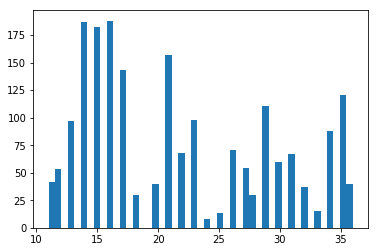

In [8]:
plt.hist(y_train, bins = 47)

In [9]:
# clear old variables
tf.reset_default_graph()

# define our input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 370, 24, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

# define model
def stixel_model(X,y,is_training):
    conv1 = tf.layers.conv2d(inputs=X, filters=64, kernel_size=[11, 5], 
                             padding="same", use_bias=True, activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[8, 4], strides=(8, 4))
    conv2 = tf.layers.conv2d(inputs=pool1, filters=200, kernel_size=[5, 3], 
                             padding="same", use_bias=True, activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[4, 3], strides=(4,3))
#     pool2_flat = tf.reshape(pool2, [-1, 1 * 11* 200])
    pool2_flat = tf.layers.flatten(inputs=pool2)
    dense3 = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout3 = tf.layers.dropout(inputs=dense3, rate=0.5, training=is_training)
    dense4 = tf.layers.dense(inputs=dropout3, units=2048, activation=tf.nn.relu)
    dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=is_training)
    y_out = tf.layers.dense(inputs=dropout4, units=47)
    return y_out

y_out = stixel_model(X,y,is_training)


#predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
 #     "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
  #    "probabilities": tf.nn.softmax(logits, name="softmax_tensor")

In [10]:
# total_loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(indices=y, depth=50, axis=-1), logits=y_out)
total_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.one_hot(indices=y, depth=47, axis=-1), logits=y_out)
#tf.summary.histogram('total_loss',total_loss) ####################
mean_loss = tf.reduce_mean(total_loss)


print(1)


1


In [11]:
# optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-2, momentum=0.9) 
# tf.train.MomentumOptimizer(learning_rate=1e-2, momentum=0.9)

'''# decay every 10000 steps with a base of 0.5:
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 1e-2
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           decay_steps=10000, decay_rate=0.5, staircase=True)

# Passing global_step to minimize() will increment it at each step.
optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-2, momentum=0.9, decay=0)
train_step = optimizer.minimize(mean_loss, global_step=global_step)'''
# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate #### 5e-4
train_step = optimizer.minimize(mean_loss)

In [ ]:
"""
# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss)
"""

In [12]:


def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=128, print_every=50,
              training=None, plot_losses=False):
    
    train_writer = tf.summary.FileWriter( './logs/2/train ', sess.graph) #TB
    # have tensorflow compute accuracy
    the_prediction = tf.argmax(predict,axis=1)
    correct_prediction = tf.equal(tf.argmax(predict,axis=1),y)
#     correct_prediction = correct = tf.equal(tf.argmax(tf.nn.sigmoid(predict),axis=1),y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.histogram('accuracy',accuracy) #TB
    tf.summary.scalar('accuracy',accuracy)
    tf.summary.scalar('mean_loss',mean_loss)

    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None

    variables = ['_', mean_loss,correct_prediction, the_prediction ,accuracy] #TB

    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute    
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now}
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            
            merge = tf.summary.merge_all() #TB
            variables[0] = merge #TB
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
  
            summary, loss, corr,pred, _ = session.run(variables,feed_dict=feed_dict) #TB
            print('pred: ', pred)
            train_writer.add_summary(summary, iter_cnt) #TB
    
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Epoch {0}: Iteration {1}: with minibatch training loss = {2:.3g} and accuracy of {3:.2g}"\
                      .format(e, iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2} Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    
    return total_loss,total_correct

In [13]:
tensors_to_log = {"probabilities": "softmax_tensor"}

saver = tf.train.Saver()
sess = tf.Session()


sess.run(tf.global_variables_initializer())
saver.save(sess, './training_data/stixelnet_model.ckpt')
print('Training')
run_model(session=sess, predict=y_out, loss_val=mean_loss, Xd=X_train, yd=y_train, 
          epochs=20, batch_size=128, print_every=5, training=train_step)




Training
pred:  [20  4  4 41 30  1 29  6 46 42  4 46 11 29 42 42  0  0 22 29 40 38 15 29
 23 39 31 18  4 42 41 29 12 20  0 27 21  4 21 42 46 11 41 25 30 29 36 38
 18 21 32 39 37  6 41 44 13 38 11 22 41 11  8 27 36 44  3 12 13 21 24 32
 28  1 13 39  3 20 41 22 42 29 41 10 14 22 27 23  3 29 44 15 38 11 25 15
 41 36  4 29 31 46 29 37 32 13 21 45 28 25 42 21 20 13 44 40 23  4  1 36
  0 17 42 33 13 22 23  3]
Epoch 0: Iteration 0: with minibatch training loss = 0.691 and accuracy of 0.0078
pred:  [11 14 41  4 25 29 41 21 29 13 26 42 18 31 42 41 13  7  7  2 15 21 11 27
 26 15  6 16  7  1 15 11 22 41 11 21  7 40 25 40 45 13 15  8 21 23  6  1
 45 41 40 21 21 41 31 20 33 20 29 21 20 11  7  7 11 11 29  1 21 15 45 38
 20  0 21 20 39 11 23  7 29 15 20 40 44 10  3  7 26  3 13  7 15 20 21 25
 15 18 15 20 21  7  4 22 17 41 44 11 33  7 20 11 39  8 11  7 38 20 23 15
 21  7 45 26 15 18 44 21]
pred:  [25 18 39 29 41 18  0  7 45 41 18 20 13 29  9 39 40 40 14 26 13 39  8 32
 20 18 18 39  1  7  1 15 20 18 21

(0.018095606744289398, 0.86)

In [14]:
print('Validation')
run_model(session=sess, predict=y_out, loss_val=mean_loss, Xd=X_val, yd=y_val, 
          epochs=1, batch_size=128)


Validation
pred:  [27 30 21 27 27 30 12 22 22 12 36 11 27 29 22 12 31 30 25 21 23 16 30 11
 15 15 11 17 16 30 22 34 15 31 22 11 33 16 27 27 22 31 14 15 22 32 34 31
 29 15 15 12 30 15 32 11 30 35 16 35 23 29 22 30 20 27 11 12 11 15 35 30
 21 27 22 29 21 12 32 20 32 21 32 27 30 11 20 33 26 12 35 14 35 33 12 35
 29 26 35 35 36 35 30 21 11 36 15 27 26 22 35 30 23 22 30 30 15 20 26 12
 26 34 29 29 22 30 35 26]
pred:  [34 15 35 30 30 15 35 12 21 25 29 36 30 29 12 27 16 36 29 35 23 35 27 12
 22 11 32 22 15 27 35 12 12 21 27 22 23 27 35 29 30 32 27 29 17 29 35 12
 31 35 11 33 27 30 22 29 35 34 30 21 33 32 35 16 27 11 29 35 35 30 30 15
 27 20 29 35 27 26 20 35 21 21 35 29 29 27 35 15 35 35 14 29 15 11 20 15
 23 30 31 35 21 35 12 15 35 35 26 12 31 35 15 27 12 30 29 29 29 30 15 26
 27 34 15 12 27 23 15 12]
pred:  [23 30 31 27 29 22 15 15 21 30 23 35 27 27 30 35 35 35 15 17 34 11 33 15
 16 23 22 13 35 23 16 15 32 22 35 27 27 22 35 15 27 20 35 26 33 13 29 12
 12 27 21 36 22 15 12 35 35 29 30 29 15 

(0.19800741314888, 0.088)

In [ ]:
#from preprocessing.preprocess_func_v02_new import *
#preprocess_filtering_data(date='2011_09_26', serieses = [5], dir_path='/home/shahar_zuler/ProjectNexar')

In [15]:
print('Validation2')
X5 = np.load('X_train_5.npy')
y5 = np.load('y_train_5.npy')
run_model(session=sess, predict=y_out, loss_val=mean_loss, Xd=X5, yd=y5, 
          epochs=1, batch_size=128)

Validation2
pred:  [21 32 25 31 31 30 30 30 20 31 30 21 30 21 20 20 20 30 21 21 21 20 31 21
 31 30 21 26 21 21 20 21 21 20 26 20 20 21 31 31 21 20 21 30 21 21 20 21
 31 32 30 36 21 31 30 30 31 30 31 21 21 36 14 21 30 30 31 21 31 21 14 31
 26 21 20 20 31 14 32 21 30 20 21 20 22 31 36 21 17 30 20 26 31 36 30 30
 31 21 31 21 16 30 30 36 26 31 31 20 21 31 21 20 34 20 20 26 21 36 30 31
 21 20 11 21 26 30 26 30]
pred:  [36 21 30 25 30 31 31 21 21 20 30 30 20 30 26 21 18 20 21 21 31 21 31 18
 31 30 30 31 20 21 20 30 30 31 26 31 31 34 36 26 31 21 20 30 21 14 36 20
 21 20 20 20 21 36 21 21 31 30 21 21 30 20 21 21 14 31 21 26 30 30 20 21
 17 21 21 30 21 26 14 21 30 21 21 20 31 32 21 32 21 31 21 26 21 21 30 20
 21 31 30 20 30 31 31 21 30 30 30 21 20 30 21 30 26 31 20 20 20 31 31 30
 21 20 34 20 36 20 31 30]
pred:  [21 30 21 20 21 25 20 36 32 30 21 30 20 30 20 21 21 31 31 21 30 36 20 21
 21 20 36 21 21 31 21 20 30 31 20 20 31 21 36 20 31 21 30 20 30 21 20 21
 21 25 31 26 30 21 31 30 20 31 21 17 22

(0.1295195860811295, 0.1685976827806632)